In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
### Just some matplotlib tweaks
import matplotlib as mpl

mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 1.5
mpl.rcParams["figure.dpi"] = 200
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=True)
rc('xtick', labelsize='medium')
rc('ytick', labelsize='medium')
rc("axes", labelsize = "large")
def cm2inch(value):
    return value/2.54

In [61]:
def gaussian(x, mu, sigma):
    return 1/np.sqrt(2*np.pi)/sigma*np.exp(-(x-mu)**2 / (2*sigma**2))

In [62]:
x = np.linspace(-3, 3)
tau = 0.5

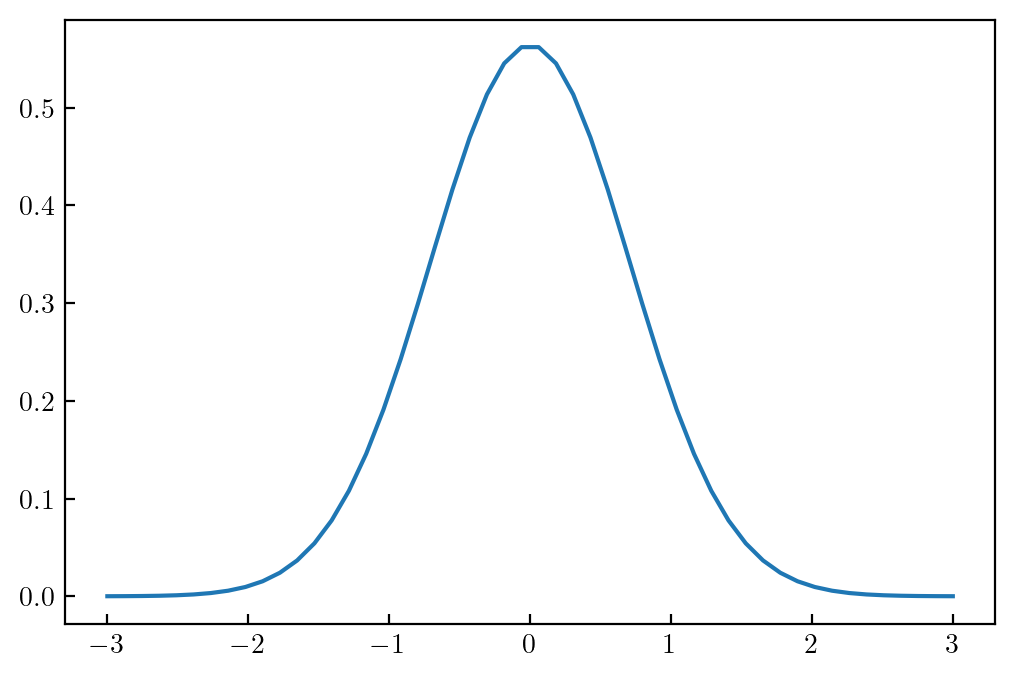

In [63]:
plt.plot(x, gaussian(x,0 , np.sqrt(tau)))

In [105]:
x = np.linspace(1, 1)

tau = 0.0001
np.trapz(gaussian(x,0 , np.sqrt(tau)),x)

0.0

In [106]:
 rdm = np.random.normal(0,np.sqrt(tau), 1000)

In [107]:
def hist(x, bins=15):
    Y, X = np.histogram(x, bins, density=True)
    X = (X[1:] + X[:-1])/2
    return X,Y


In [108]:
X,Y = hist(rdm)

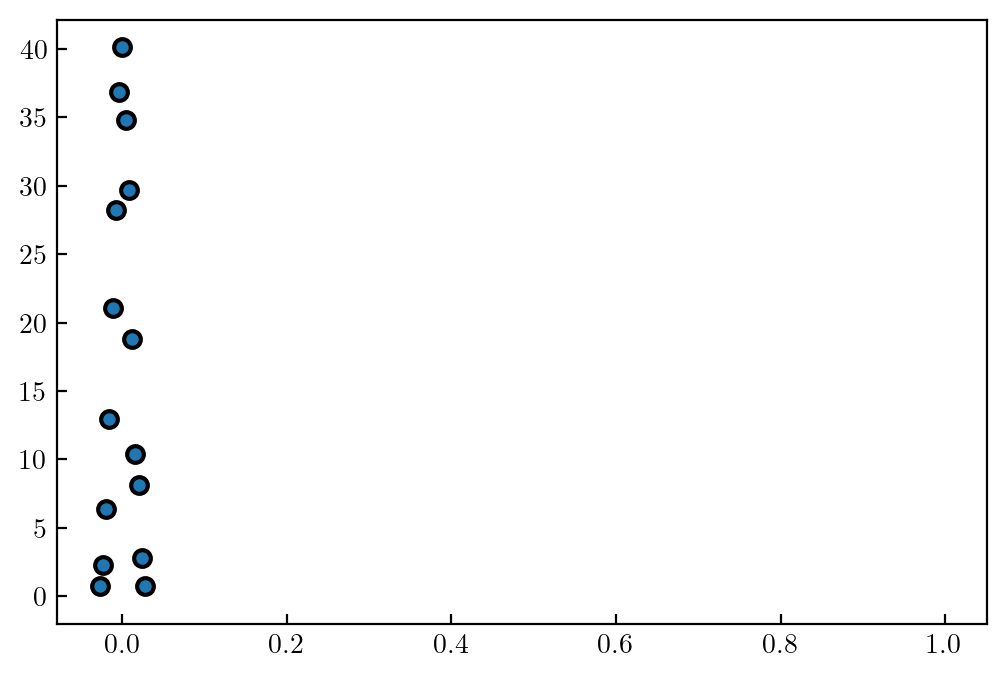

In [109]:
plt.plot(X,Y, "o")
plt.plot(x, gaussian(x,0 , np.sqrt(tau)))

In [286]:
Ns = [*np.arange(10,100,10),*np.arange(100,1000,100), *np.arange(1000,10000,1000),*np.arange(10000,100000,10000), *np.arange(100000,1000000,100000)]

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:23<00:00,  4.17it/s]


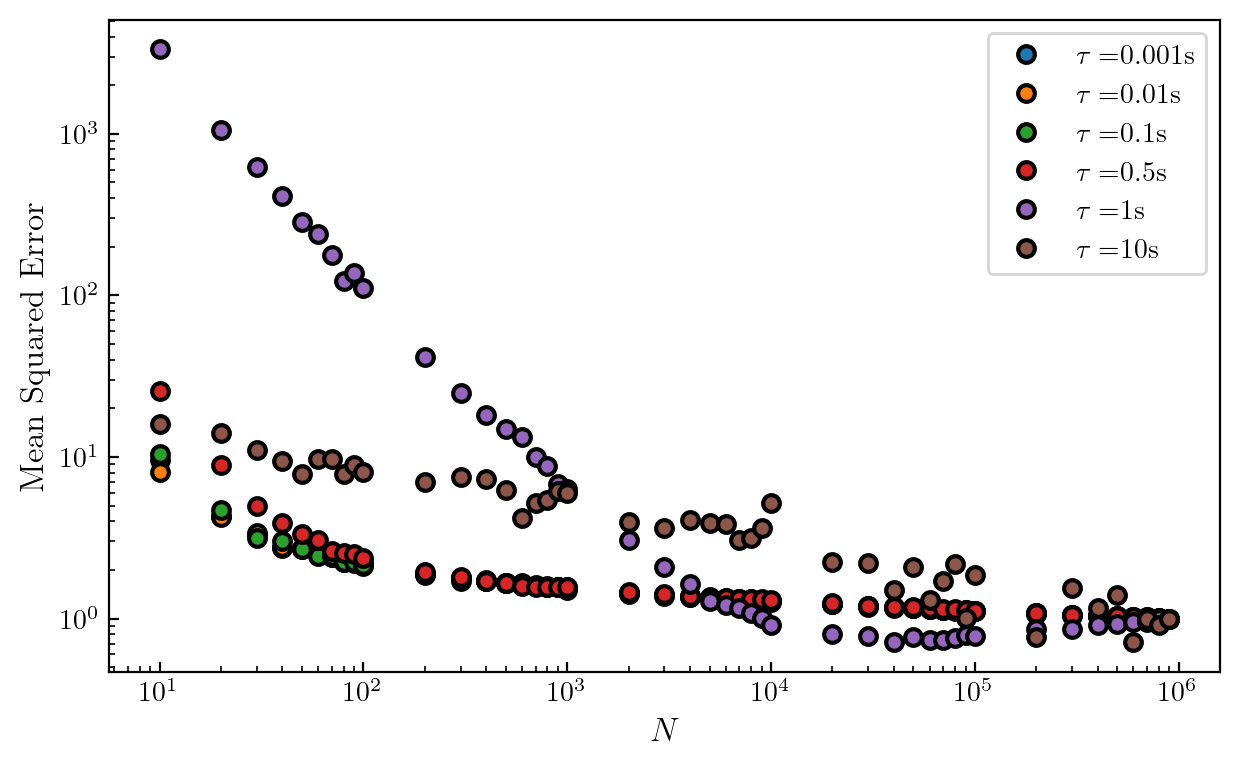

In [300]:
plt.figure(figsize=( cm2inch(16),cm2inch(10)))
taus = [0.001,0.01, 0.1,0.5, 1, 10]
for tau in taus:
    errs = np.zeros(len(Ns))
    for _ in trange(100):
        for n,i in enumerate(Ns):
            rdm = np.random.normal(0,np.sqrt(tau), i)
            X,Y = hist(rdm, 10) 
            errs[n] += np.mean((Y - gaussian(X, 0, 1/np.sqrt(tau))) ** 2)
    errs = errs / 10
    plt.loglog(Ns, errs / errs[-1], "o",label = "$\\tau = $" + str(tau) + "s")
plt.ylabel("Mean Squared Error")
plt.xlabel("$N$")
plt.legend()
plt.tight_layout()
plt.savefig("MSE.svg")

In [234]:
errs[-1]

0.00019797422877317517

In [235]:
np.mean(errs[:-4])

0.014511510859620044

In [143]:
gaussian(X, 0, tau)

array([1.12777905e-04, 9.11213856e-04, 5.41100420e-03, 2.36154753e-02,
       7.57489771e-02, 1.78573955e-01, 3.09400296e-01, 3.93989453e-01,
       3.68731066e-01, 2.53627374e-01, 1.28216461e-01, 4.76379107e-02,
       1.30083703e-02, 2.61068419e-03, 3.85076529e-04])

In [144]:
X

array([-4.04256146, -3.4876337 , -2.93270593, -2.37777817, -1.82285041,
       -1.26792264, -0.71299488, -0.15806712,  0.39686065,  0.95178841,
        1.50671617,  2.06164394,  2.6165717 ,  3.17149946,  3.72642723])

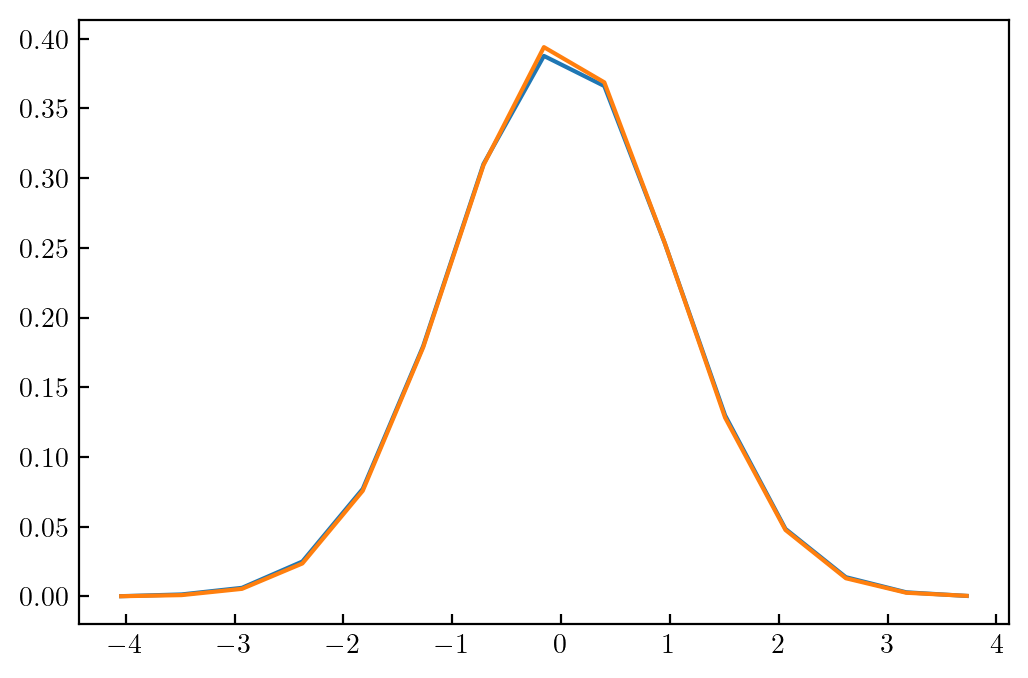

In [145]:
plt.plot(X,Y)
plt.plot(X, gaussian(X, 0, tau))

In [147]:
np.sum((Y - gaussian(X, 0, tau))** 2)

5.644036930907413e-05